 Нужно решить задачу классификации физических лиц по уровню дохода. Д
Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df =pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Проверка на пропуски

In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.info() # проверка на null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# альтернативная проверка
df.isnull().any().any() # проверка на NAN
#isnull() - возвращает датафрейм из true и false если значения NAN или не NAN
# первое any - возвращает колонки с наличием nan
# второе - ищет в колонках nan и выдает результат.

# пропусков нет.

False

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
# замена "?" на моду.
columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country','income']

for column in columns:
    df[column].replace('?', np.nan, inplace=True)
    df[column].fillna(df[column].mode()[0], inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


C:\Users\koloskov\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


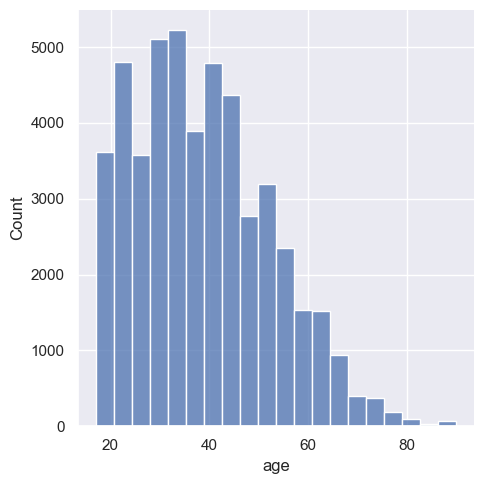

In [ ]:
import seaborn as sns

sns.set_theme(style="darkgrid")

sns.displot(
    df, x="age",
    facet_kws=dict(margin_titles=True), bins =20
)

# по графику можно сделать вывод что основной возаст от 20 до 40 лет.

In [ ]:
df1 = df[(df['marital-status']== 'Never-married') & (df['income']== '>50K')]
df2 = df[(df['marital-status']== 'Married-civ-spouse') & (df['income']== '>50K')]

C:\Users\koloskov\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\koloskov\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


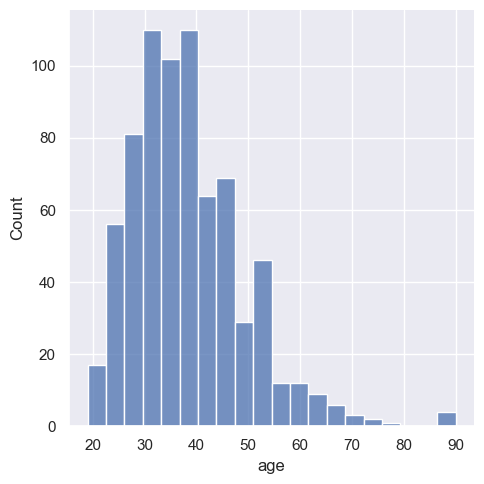

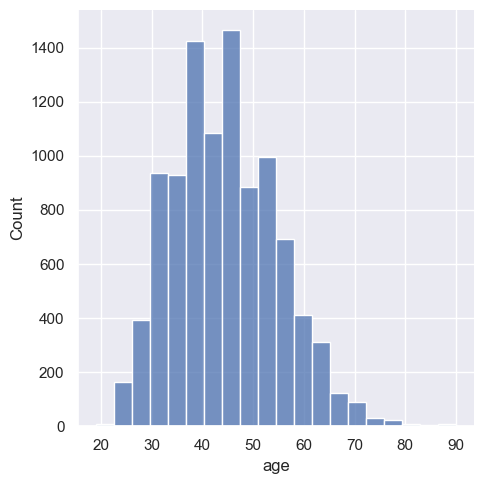

In [ ]:
sns.set_theme(style="darkgrid")

plot = sns.displot(
    df1, x="age",
    facet_kws=dict(margin_titles=True,), bins =20
)
sns.displot(
    df2, x="age",
    facet_kws=dict(margin_titles=True), bins =20
)
# По графикам видно, что возраст не женатых людей имеющих доход больше 50тыс находися в районе 30-40 лет,
# в то время как возраст людей живущих гражданским браком находится в районе 45-50 лет


Преобразовываем данные в категориальные признаки.

In [ ]:
df.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K


In [ ]:
obj_df = df.select_dtypes(include=['object']).copy() # поиск только категориальных столбцов
obj_df.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [ ]:
# перевод их в численные данные
df_dum = pd.get_dummies(obj_df, columns=obj_df.columns)
df_dum.head()


,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
# удаление целевой переменной
X = df_dum
del X['income_>50K']
del X['income_<=50K']
X.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
# Добавление столбцов с числовыми данными
df1 = df[['age', 'fnlwgt',
       'capital-gain', 'capital-loss', 'hours-per-week'
       ]]


X = pd.concat([X, df1], axis=1)
X.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,25,226802,0,0,40
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,38,89814,0,0,50
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,28,336951,0,0,40
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,44,160323,7688,0,40
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,18,103497,0,0,30


Разделение выборки на обучающее и тестовое подмножество.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# целевая переменная (столбец sex) снова является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit( df['income'] )

LabelEncoder()

In [ ]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [ ]:
y = pd.Series( data = le.transform( df['income'] ) )
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [ ]:
model = LogisticRegression()

In [ ]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Обучение модели логистической регрессии

In [ ]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
predictions

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
model.score(X_train, y_train)

0.8515854938192614

In [ ]:
model.score(X_test,y_test) # модель работат. Точность предскзания 85 %

0.8551540587572934

Обучите модели опорных векторов. Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

In [ ]:
from sklearn.svm import SVC

# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
clf.score(X_train, y_train)

0.8611573209121388

In [ ]:
clf.score(X_test, y_test) # точности моделей совпадают. Метод работает.

0.8538233186610708